In [41]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import shutil

In [48]:
original = pd.read_excel('Diploma data.xlsx')  

In [49]:
# Define the column pairs
q_columns = ['Q1 Фізичне здоров’я', "Q2 Психологічне здоров'я", 'Q3 Соціальні відносини', 'Q4 Середовище']
result_columns = ['Загальний бал резтльєнтності', 'Шкала Безнадії Бека', 'Загальний показник тривоги', 'Загальний показник депресії']

# Initialize an empty list to store the results
correlations = []

# Calculate correlation and p-value for each pair
for q_col in q_columns:
    for res_col in result_columns:
        corr_coef, p_value = pearsonr(original[q_col], original[res_col])
        correlations.append({'Q Column': q_col, 'Result Column': res_col, 'Correlation Coefficient': corr_coef, 'P-Value': p_value})

# Convert the results to a DataFrame
correlation_df = pd.DataFrame(correlations)

correlation_df

,Q Column,Result Column,Correlation Coefficient,P-Value
0,Q1 Фізичне здоров’я,Загальний бал резтльєнтності,0.332079,3.166955e-02
1,Q1 Фізичне здоров’я,Шкала Безнадії Бека,-0.375765,1.419216e-02
2,Q1 Фізичне здоров’я,Загальний показник тривоги,-0.104133,5.116431e-01
3,Q1 Фізичне здоров’я,Загальний показник депресії,-0.323491,3.664005e-02
4,Q2 Психологічне здоров'я,Загальний бал резтльєнтності,0.649724,3.226364e-06
5,Q2 Психологічне здоров'я,Шкала Безнадії Бека,-0.700985,2.345426e-07
6,Q2 Психологічне здоров'я,Загальний показник тривоги,-0.398200,9.007969e-03
7,Q2 Психологічне здоров'я,Загальний показник депресії,-0.586585,4.455828e-05
8,Q3 Соціальні відносини,Загальний бал резтльєнтності,0.243117,1.208040e-01
9,Q3 Соціальні відносини,Шкала Безнадії Бека,-0.286166,6.617562e-02


In [50]:
correlation_df.to_excel("correlation.xlsx")

In [ ]:
output_directory = pathlib.Path("./graph")

# Recreate directory
shutil.rmtree(output_directory, ignore_errors=True)
output_directory.mkdir(exist_ok=True)

# Create plots
for q_col in q_columns:
    for res_col in result_columns:
        # sns.scatterplot(x=original[q_col], y=original[res_col])
        sns.regplot(x=original[q_col], y=original[res_col], scatter_kws={'alpha':0.5})
        plt.title(f'Кореляція між "{q_col}" і "{res_col}"')
        plt.xlabel(q_col)
        plt.ylabel(res_col)


        # Save the plot as a PNG file
        filename = f'correlation_{q_col}_vs_{res_col}.png'.replace(' ', '_').replace('\'', '')
        plt.savefig(output_directory / filename)

        # Show the plot
        plt.show()

In [87]:
from scipy.stats import ttest_ind


# Define the categorical variables and result columns
categorical_columns = ['Стать', 'Вік', 'Працевлаштування', 'Знання мови країни еміграції', 'Тривалість життя в еміграції']
result_columns = ['Загальний бал резтльєнтності', 'Шкала Безнадії Бека', 'Загальний показник тривоги', 'Загальний показник депресії']

# Initialize a list to store t-test results
t_test_results = []

# Perform t-test for each pair of categorical and result columns
for cat_col in categorical_columns:
    for res_col in result_columns:
        # Get the data for the two groups based on the categorical column
        group1 = original[original[cat_col] == original[cat_col].unique()[0]][res_col]
        group2 = original[original[cat_col] == original[cat_col].unique()[1]][res_col]
        
        # Perform Independent Samples t-test
        t_statistic, p_value = ttest_ind(group1, group2)
        
        # Append the t-test results to the list
        t_test_results.append([cat_col, res_col, t_statistic, p_value])

# Create a DataFrame from the list of t-test results
t_test_df = pd.DataFrame(t_test_results, columns=['Categorical Column', 'Result Column', 'T-Statistic', 'P-Value'])

t_test_df.to_excel("test_t.xlsx")

# Display the t-test results
t_test_df

,Categorical Column,Result Column,T-Statistic,P-Value
0,Стать,Загальний бал резтльєнтності,-0.492599,0.624989
1,Стать,Шкала Безнадії Бека,1.093817,0.280579
2,Стать,Загальний показник тривоги,-1.348055,0.185226
3,Стать,Загальний показник депресії,-0.108166,0.914405
4,Вік,Загальний бал резтльєнтності,-1.457560,0.154707
5,Вік,Шкала Безнадії Бека,1.583915,0.123048
6,Вік,Загальний показник тривоги,1.557890,0.129096
7,Вік,Загальний показник депресії,1.913872,0.064617
8,Працевлаштування,Загальний бал резтльєнтності,1.270035,0.214909
9,Працевлаштування,Шкала Безнадії Бека,-0.425908,0.673551


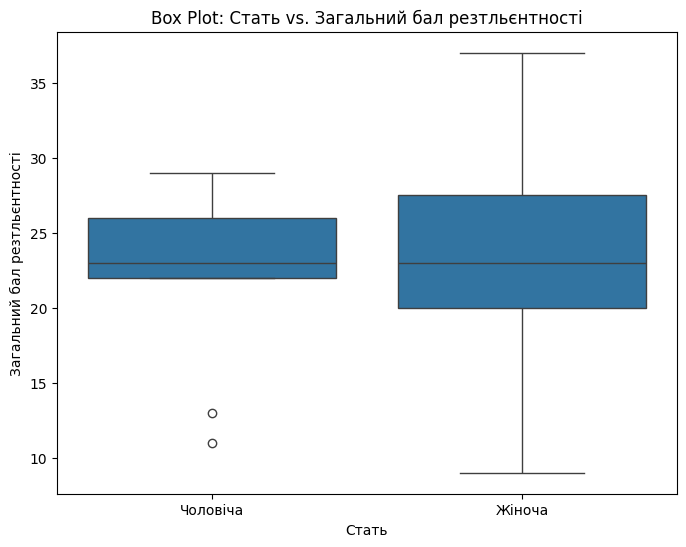

<Figure size 640x480 with 0 Axes>

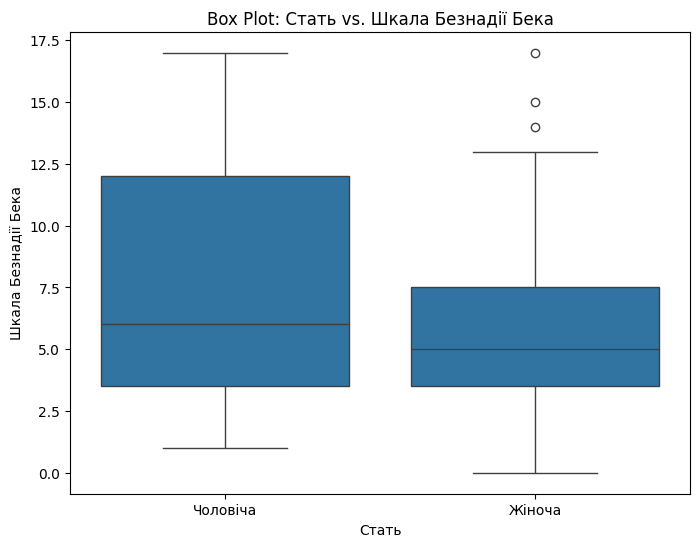

<Figure size 640x480 with 0 Axes>

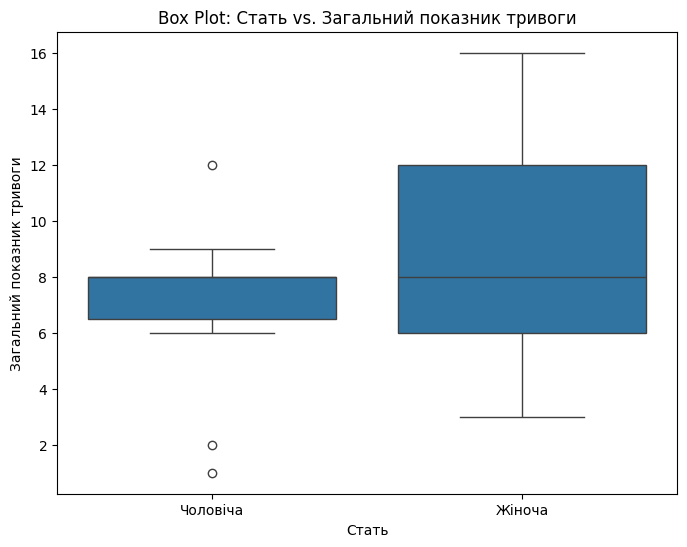

<Figure size 640x480 with 0 Axes>

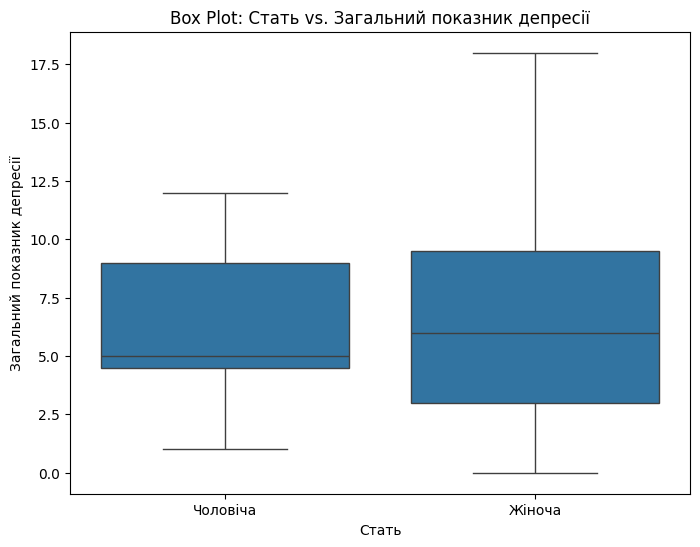

<Figure size 640x480 with 0 Axes>

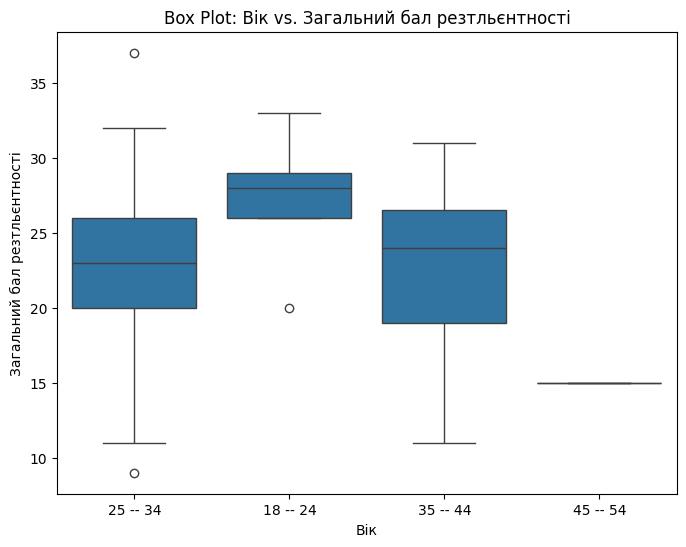

<Figure size 640x480 with 0 Axes>

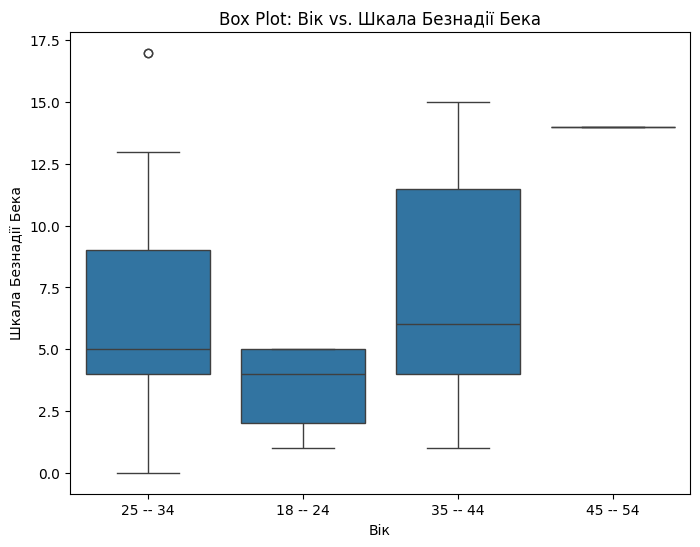

<Figure size 640x480 with 0 Axes>

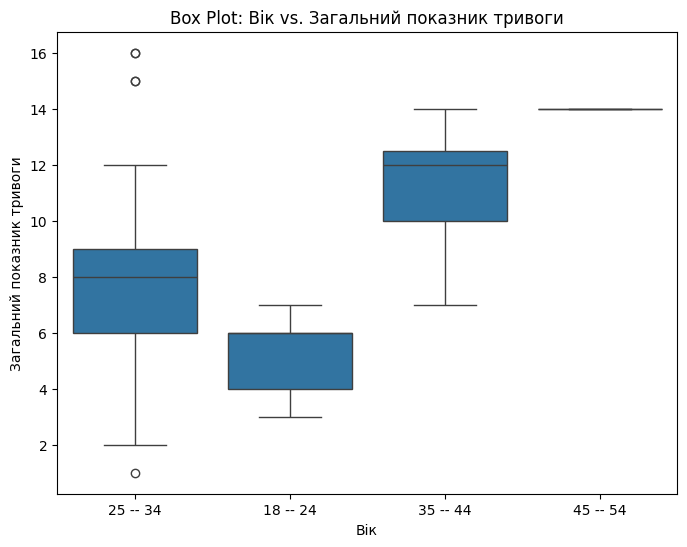

<Figure size 640x480 with 0 Axes>

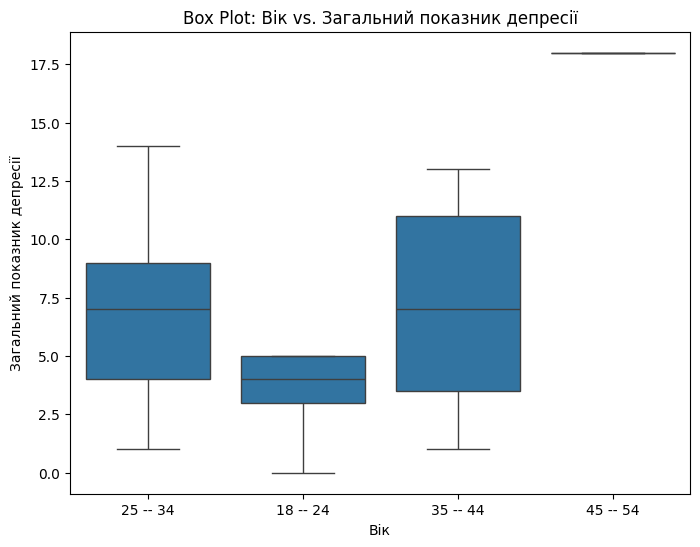

<Figure size 640x480 with 0 Axes>

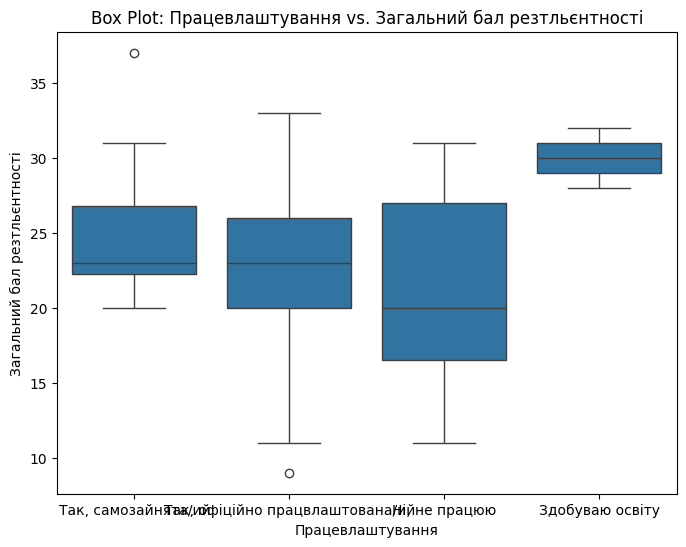

<Figure size 640x480 with 0 Axes>

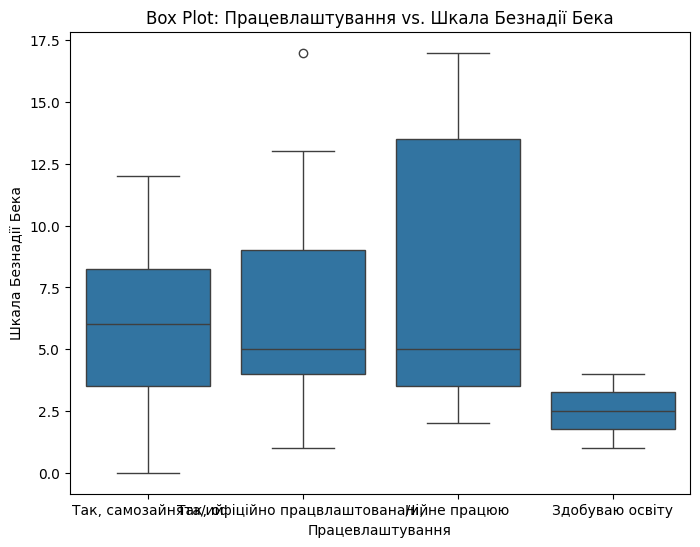

<Figure size 640x480 with 0 Axes>

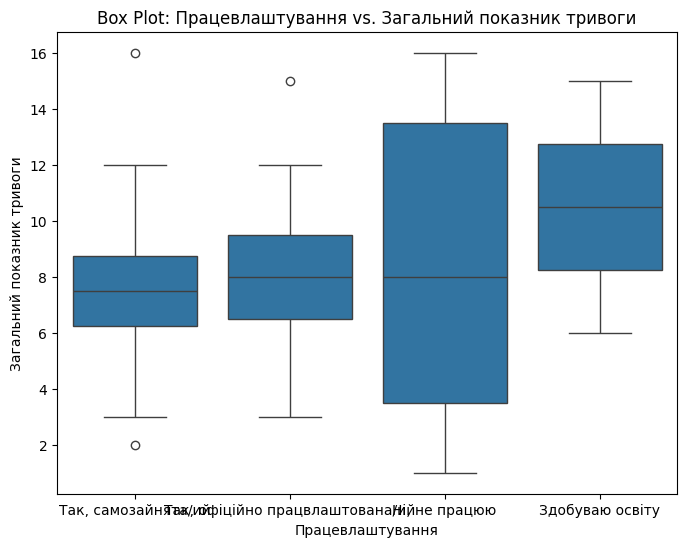

<Figure size 640x480 with 0 Axes>

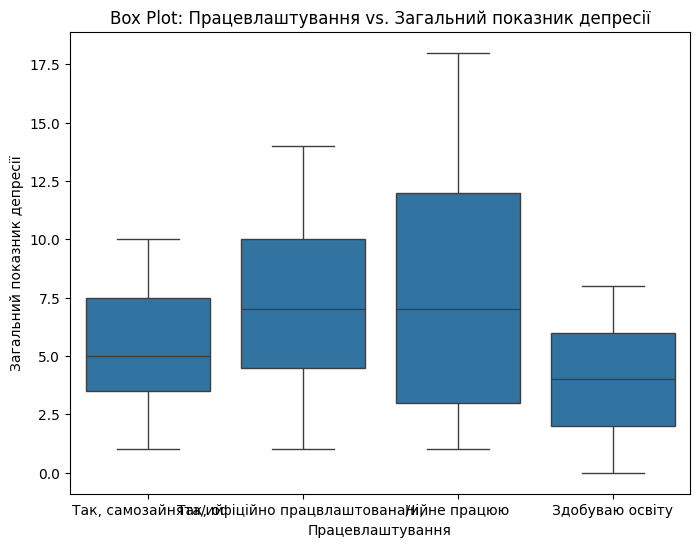

<Figure size 640x480 with 0 Axes>

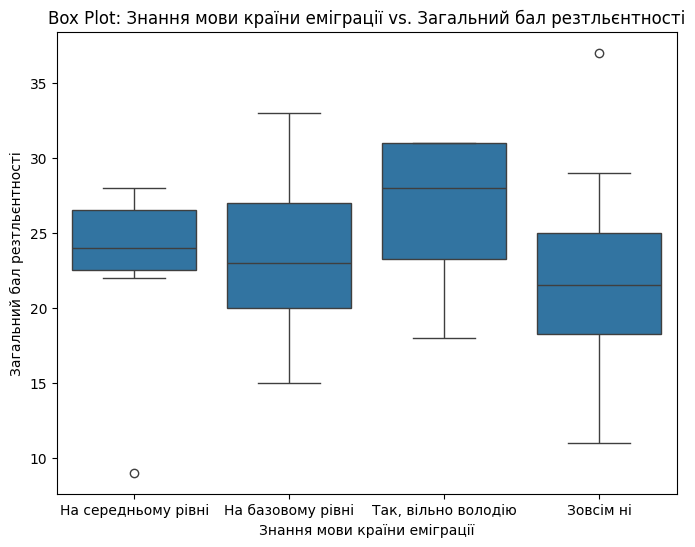

<Figure size 640x480 with 0 Axes>

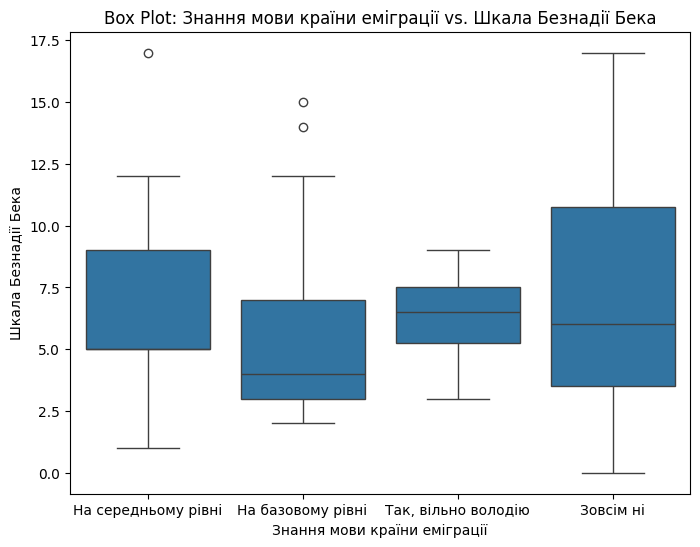

<Figure size 640x480 with 0 Axes>

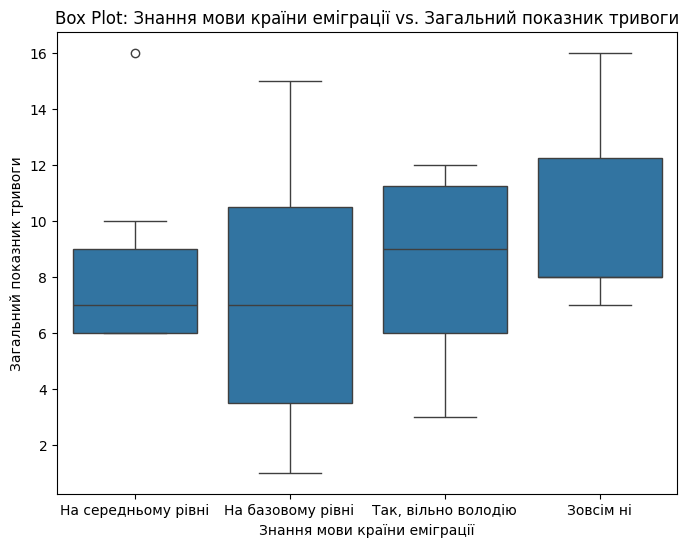

<Figure size 640x480 with 0 Axes>

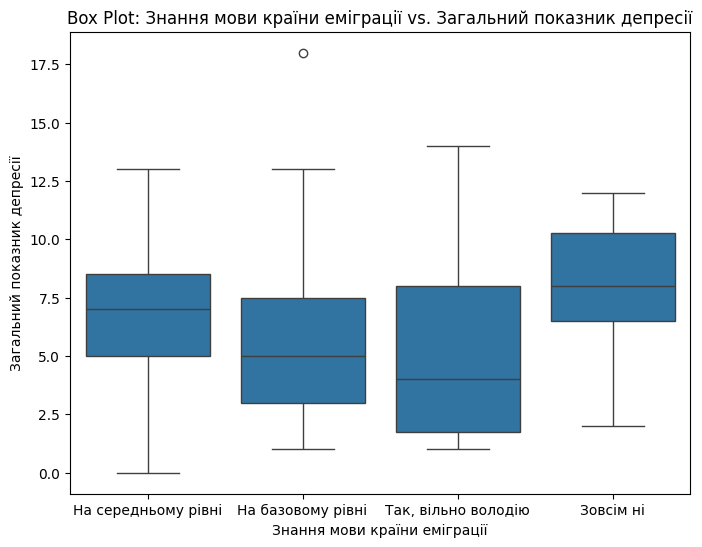

<Figure size 640x480 with 0 Axes>

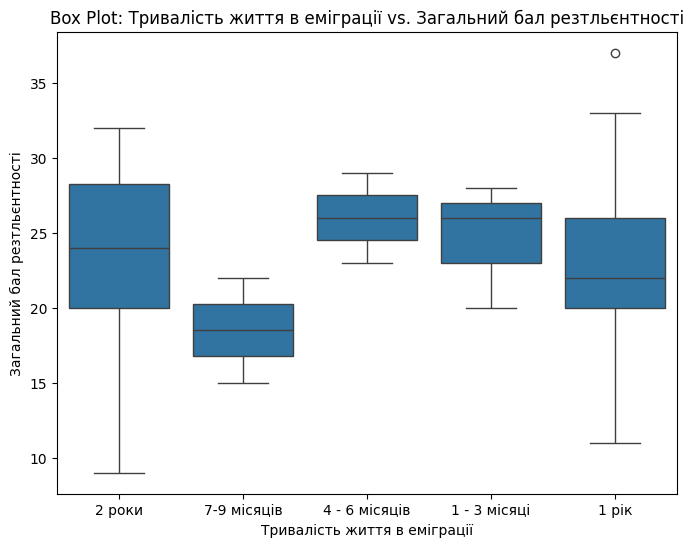

<Figure size 640x480 with 0 Axes>

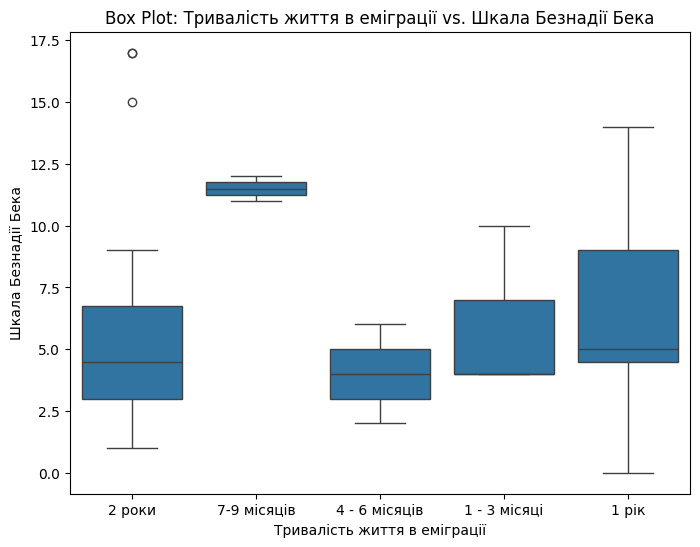

<Figure size 640x480 with 0 Axes>

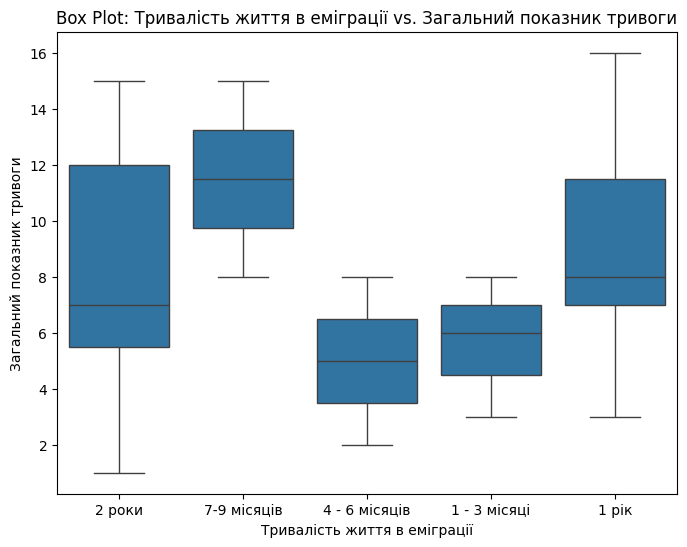

<Figure size 640x480 with 0 Axes>

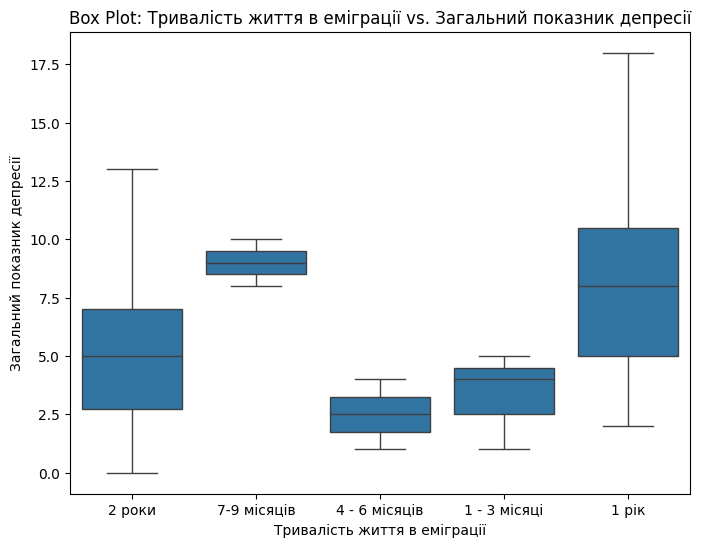

<Figure size 640x480 with 0 Axes>

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

output_directory = pathlib.Path("./t_graph")

# Recreate directory
shutil.rmtree(output_directory, ignore_errors=True)
output_directory.mkdir(exist_ok=True)


# Iterate through each t-test pair
for cat_col, res_col in zip(t_test_df['Categorical Column'], t_test_df['Result Column']):
    # Get data for the two groups based on the categorical column
    group1 = original[original[cat_col] == original[cat_col].unique()[0]][res_col]
    group2 = original[original[cat_col] == original[cat_col].unique()[1]][res_col]
    
    # Create a box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=cat_col, y=res_col, data=original)
    plt.title(f'Box Plot: {cat_col} vs. {res_col}')
    plt.xlabel(cat_col)
    plt.ylabel(res_col)

    # Save the plot as a PNG file
    filename = f'box_plot_{cat_col}_vs_{res_col}.png'.replace(' ', '_').replace('\'', '')
    plt.savefig(output_directory / filename)


    plt.show()

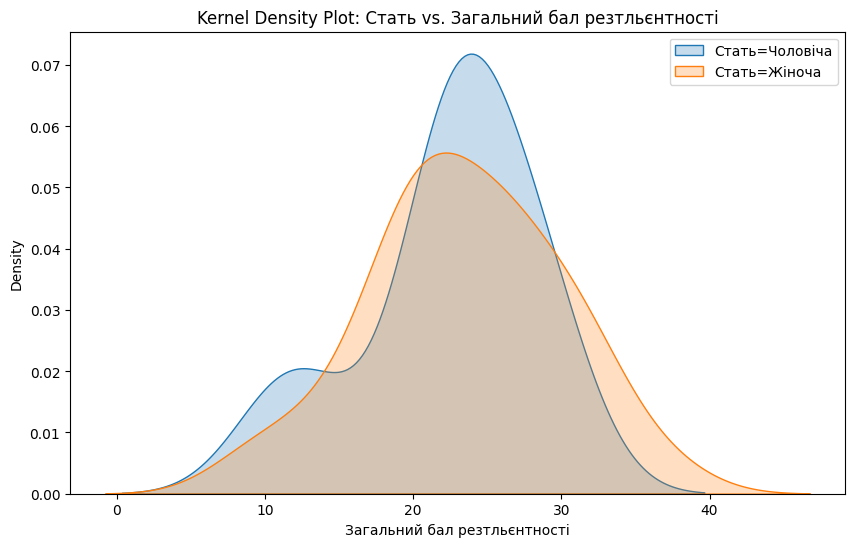

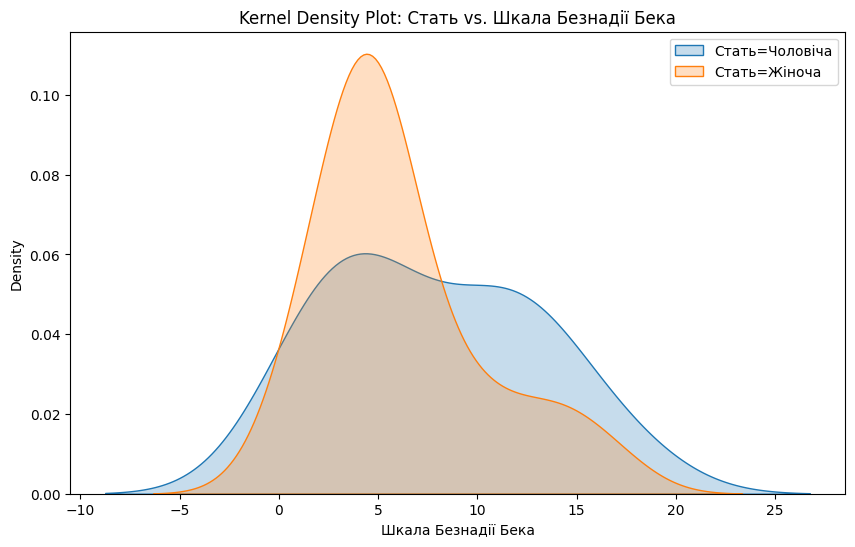

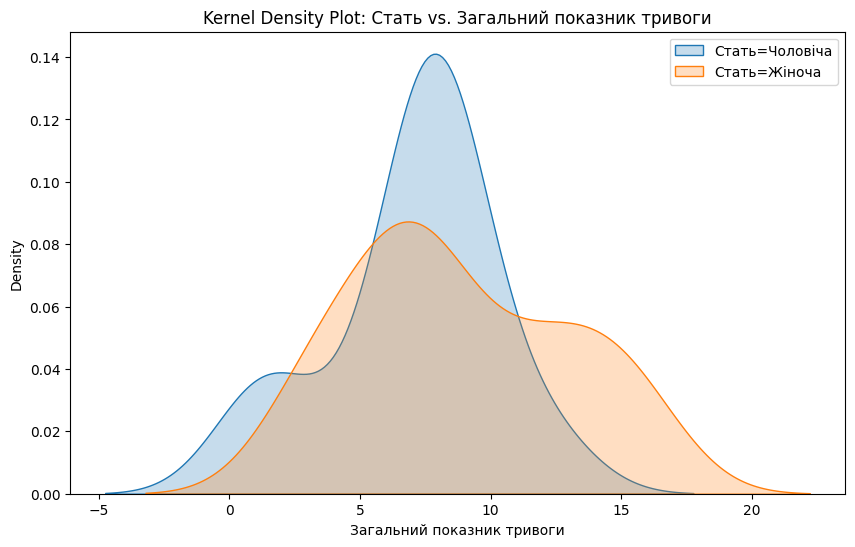

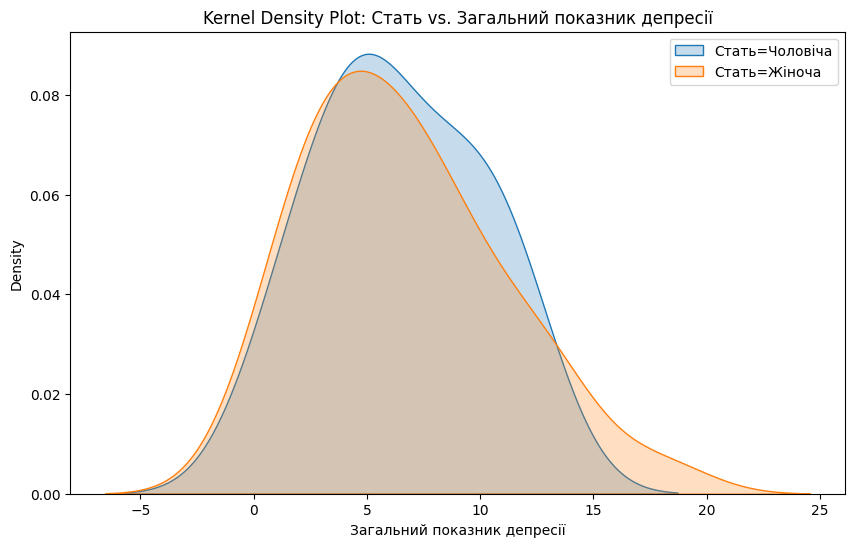

/var/folders/q8/r3vyzg8s2l92k1kpb690srl40000gn/T/ipykernel_11934/2452548036.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data, label=f'{cat_col}={category}', fill=True)


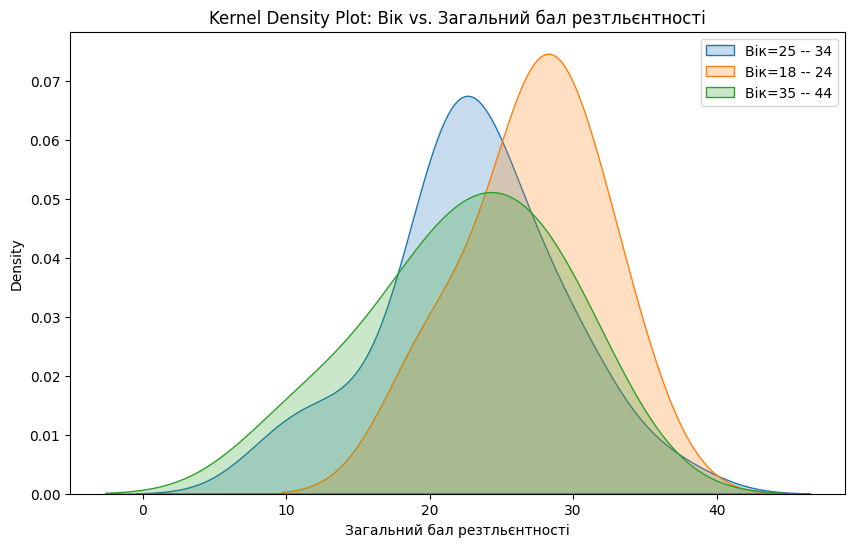

/var/folders/q8/r3vyzg8s2l92k1kpb690srl40000gn/T/ipykernel_11934/2452548036.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data, label=f'{cat_col}={category}', fill=True)


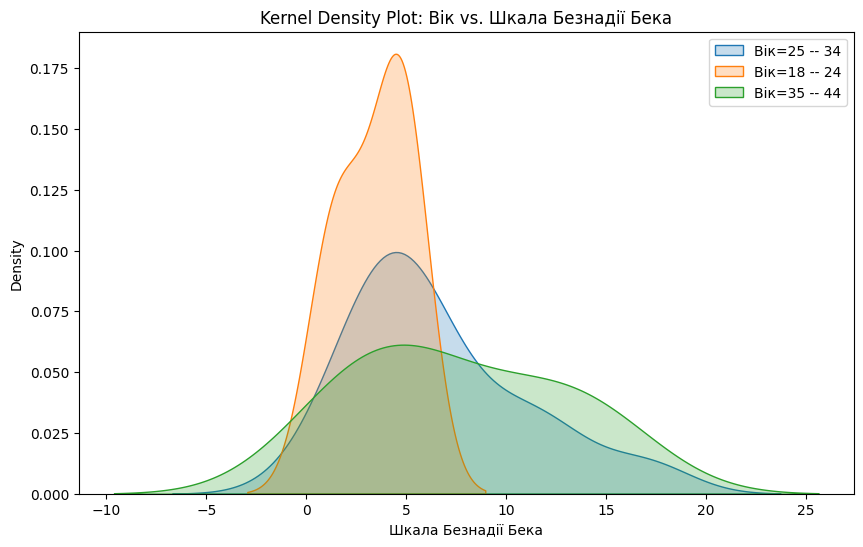

/var/folders/q8/r3vyzg8s2l92k1kpb690srl40000gn/T/ipykernel_11934/2452548036.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data, label=f'{cat_col}={category}', fill=True)


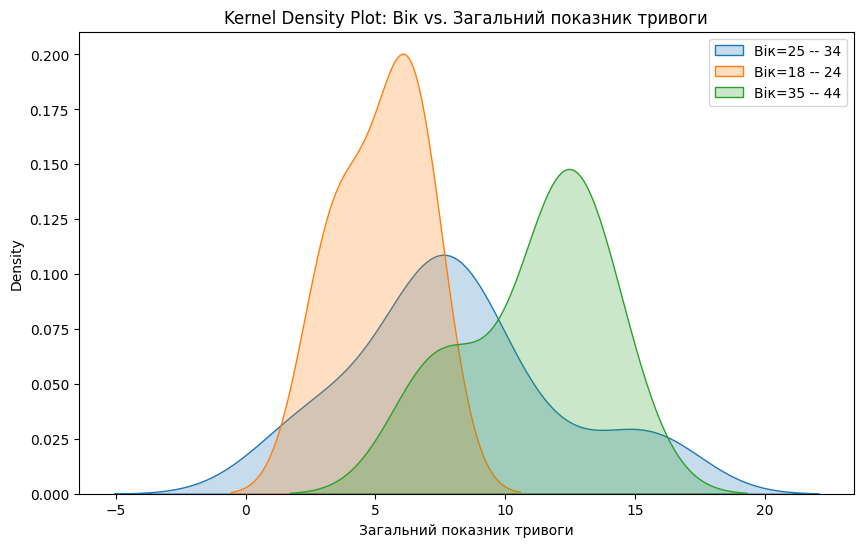

/var/folders/q8/r3vyzg8s2l92k1kpb690srl40000gn/T/ipykernel_11934/2452548036.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data, label=f'{cat_col}={category}', fill=True)


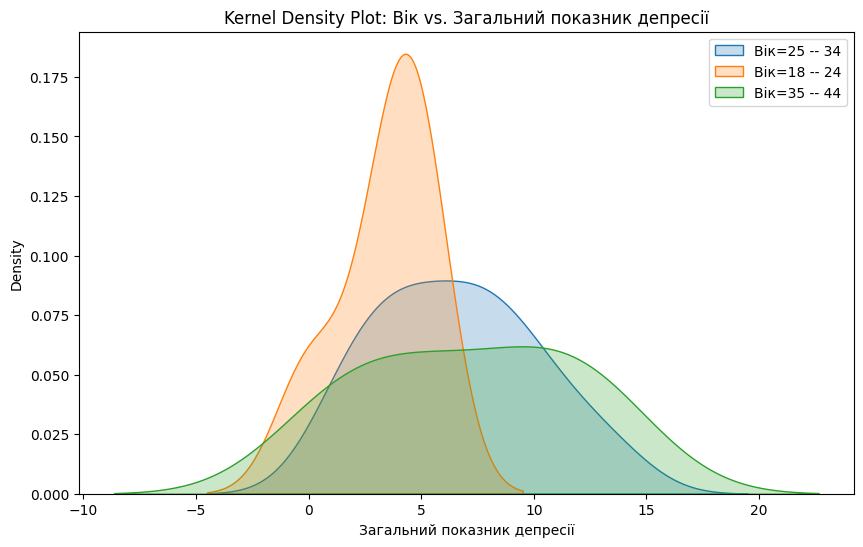

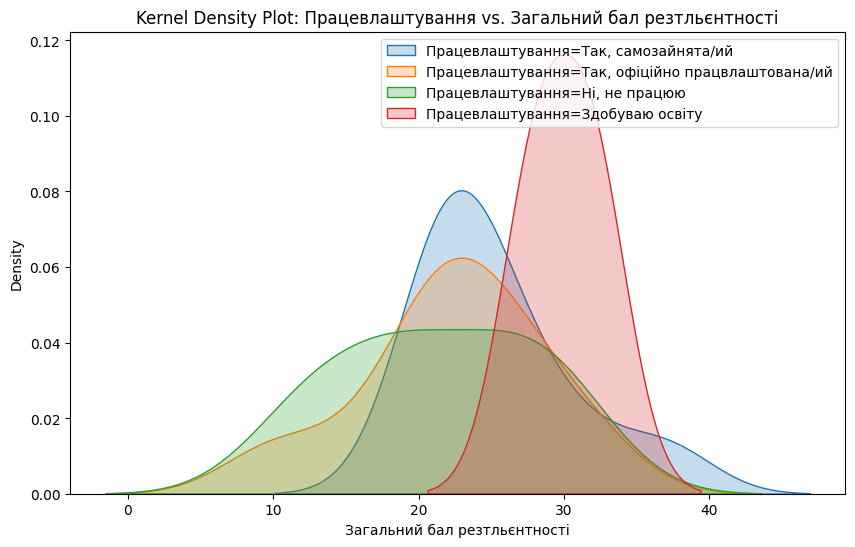

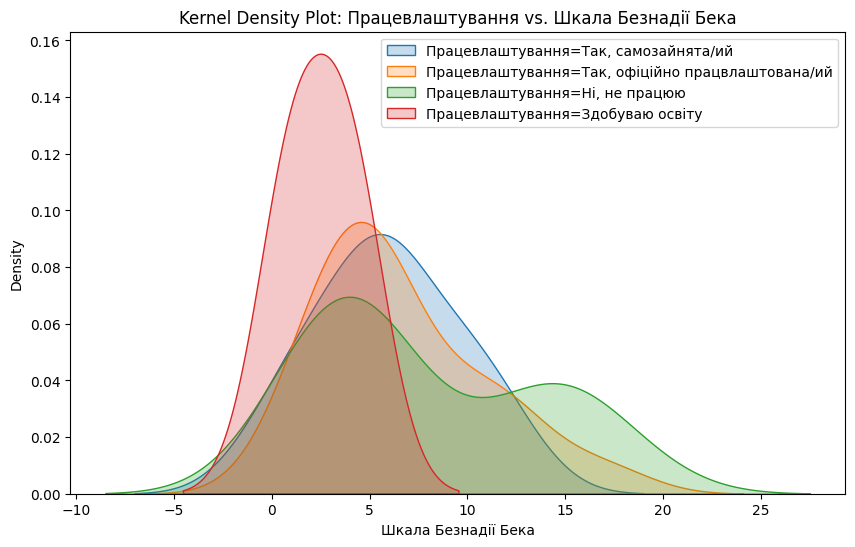

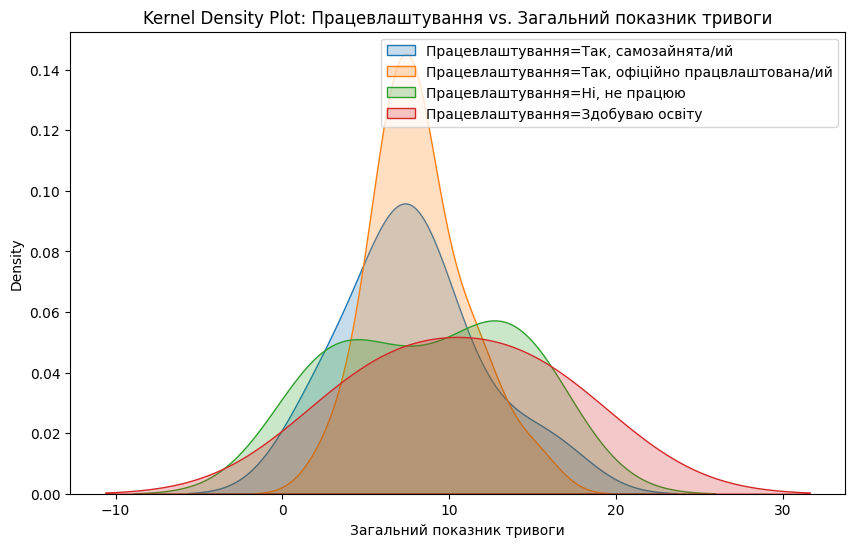

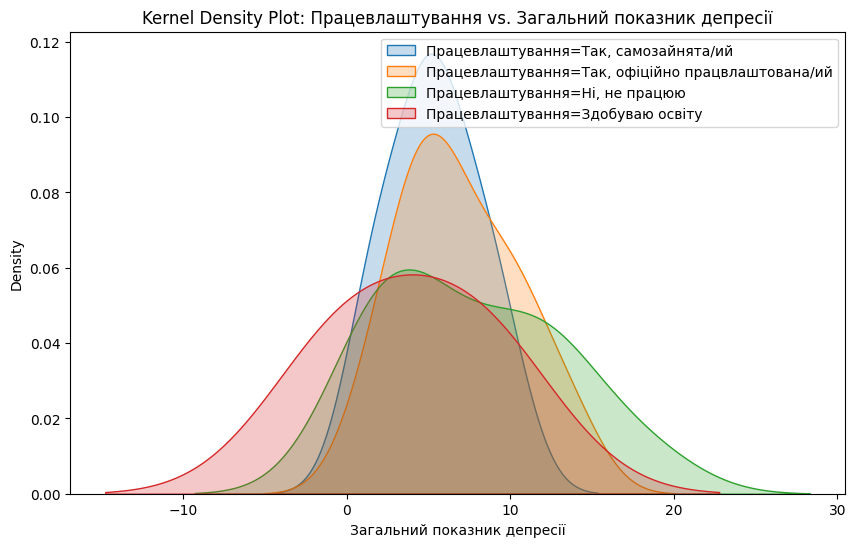

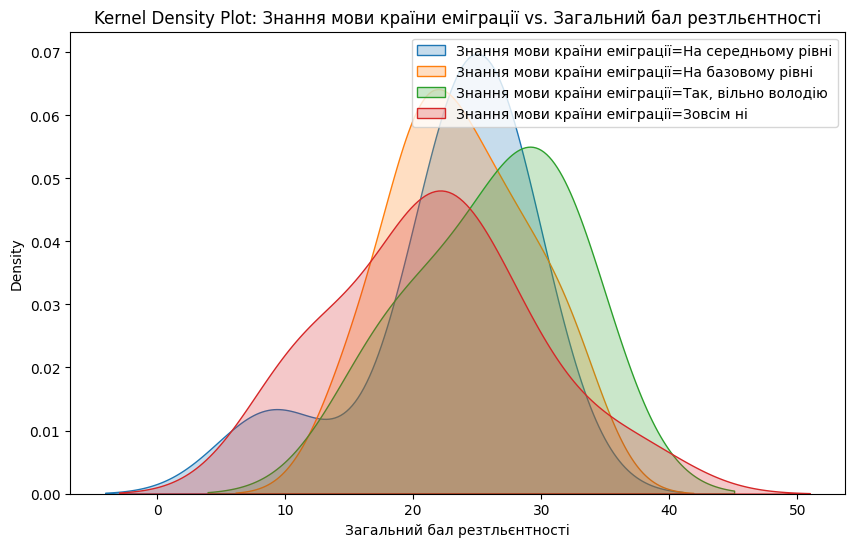

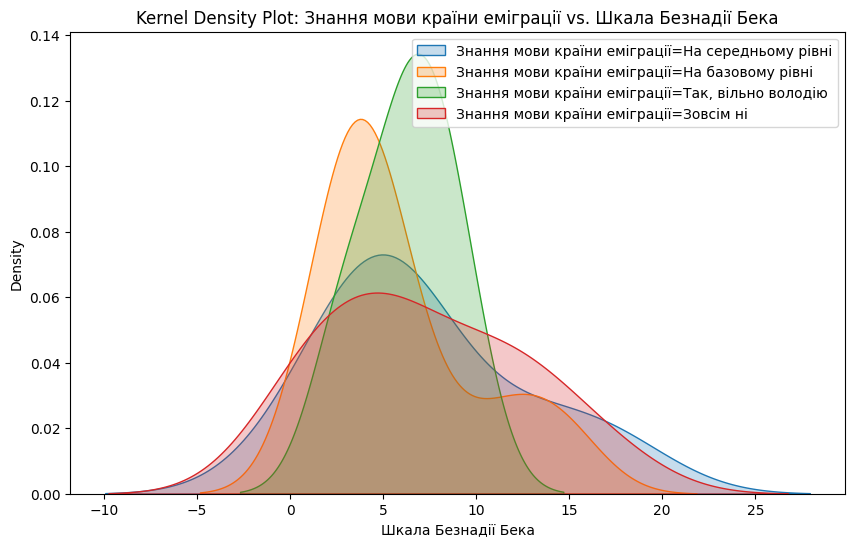

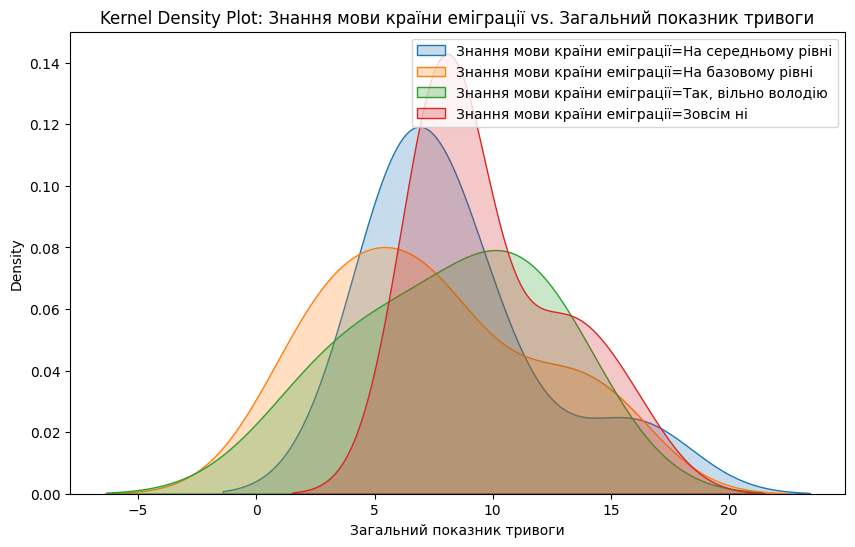

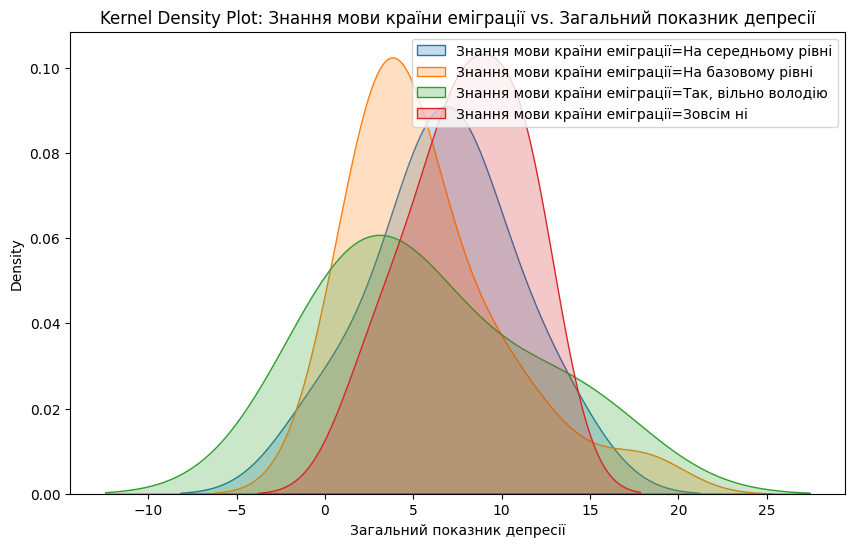

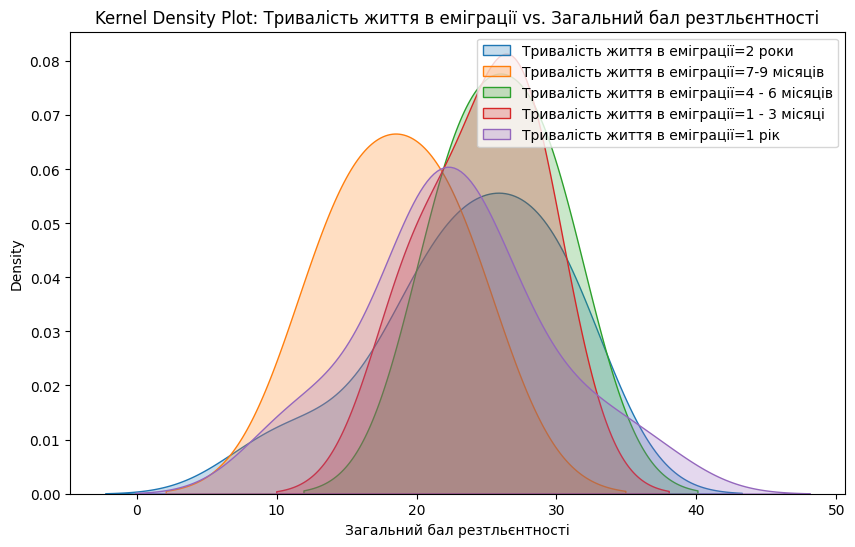

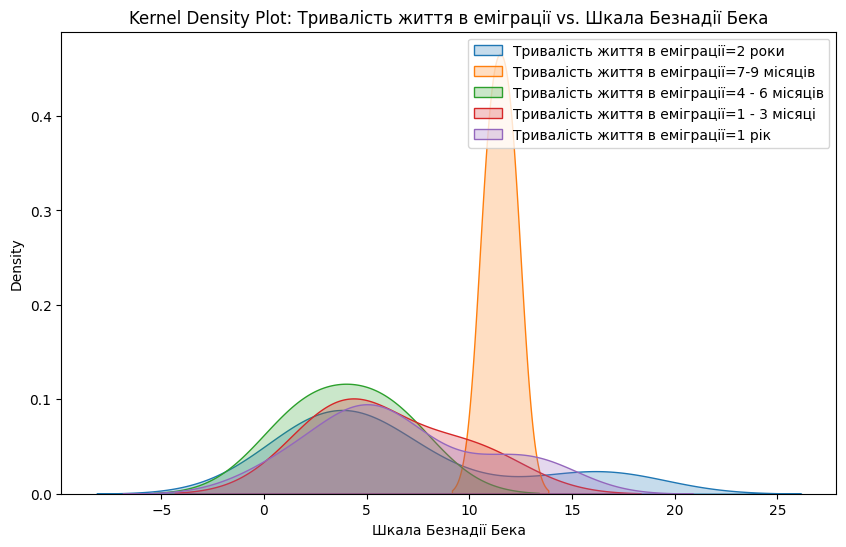

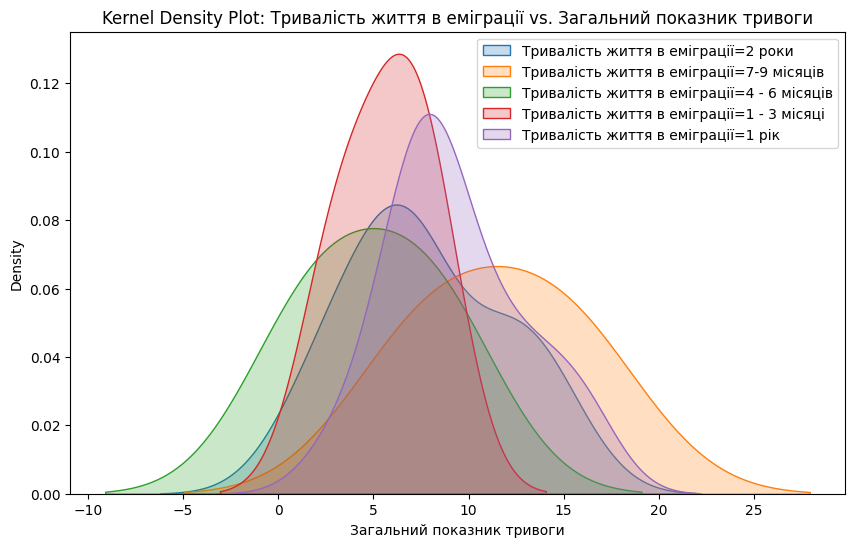

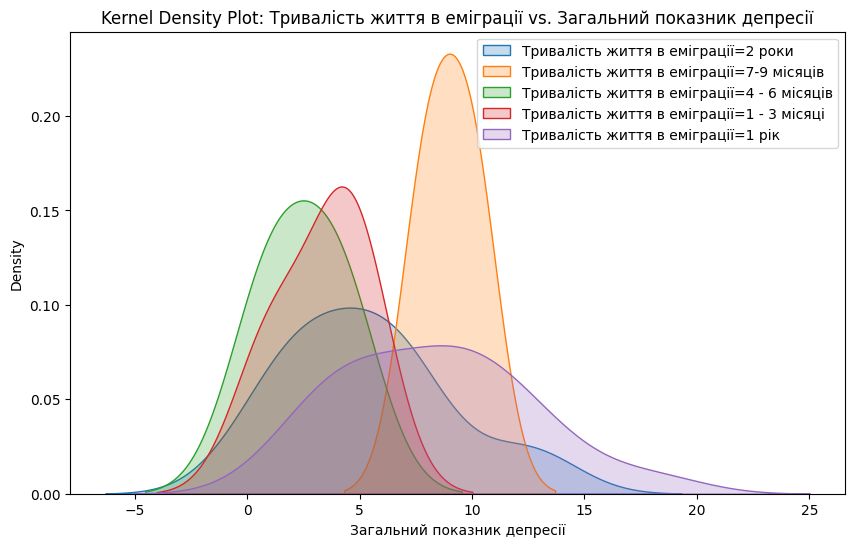

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through each t-test pair
for cat_col, res_col in zip(t_test_df['Categorical Column'], t_test_df['Result Column']):
    # Get unique categories in the categorical column
    unique_categories = original[cat_col].unique()
    
    # Create a separate Kernel Density Plot for each category
    plt.figure(figsize=(10, 6))
    for category in unique_categories:
        data = original[original[cat_col] == category][res_col]
        sns.kdeplot(data, label=f'{cat_col}={category}', fill=True)

    # Add labels and title
    plt.xlabel(res_col)
    plt.ylabel('Density')
    plt.title(f'Kernel Density Plot: {cat_col} vs. {res_col}')

    # Show legend
    plt.legend()

       # Save the plot as a PNG file
    filename = f'kernel_density_plot_{cat_col}_vs_{res_col}.png'.replace(' ', '_').replace('\'', '')
    plt.savefig(output_directory / filename)


    # Show the plot
    plt.show()

